Data generator is in the [`index_dynamic_pattern_all_stded.py`](/work/mh0033/m300883/3rdPanel/scripts/first10_last10/dynamical_pattern/index_dynamic_pattern_all_stded.py)

In [1]:
import xarray as xr
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
import src.plots.vertical_profile as profile_plots
import src.plots.PDF as pdf_plots
import src.extreme.period_pattern_extreme as extreme
import src.plots.plot_violin as violin_plots

In [4]:
import importlib
importlib.reload(profile_plots)

<module 'src.plots.vertical_profile' from '/work/mh0033/m300883/3rdPanel/src/plots/vertical_profile.py'>

# Functions

In [5]:
def read_index(pattern):
    """read index different_patterns"""
    odir = '/work/mh0033/m300883/3rdPanel/data/allPattern/dep/'+pattern+'_pattern/'
    fpath = odir+'all_'+pattern+'_nonstd.nc'
    all_index = xr.open_dataset(fpath)
    return all_index.pc

In [6]:
def standardize(index,dim = ('time','ens')):
    """
    standardardize with the mean and std of 'time' and 'ens'.
    """
    mean = index.mean(dim = dim)
    std = index.std(dim = dim)
    index = (index-mean)/std
    return index

read data

indicate the pattern

In [7]:
all_all = read_index("first")

# stadnard with *period* mean and std

## periods

select

In [9]:
first10_all = all_all.isel(time = slice(0,10))
last10_all = all_all.isel(time = slice(-10,all_all.time.size))

standardize with own mean and std

In [10]:
first10_all_period = standardize(first10_all)
last10_all_period = standardize(last10_all)

## PDF

/work/mh0033/m300883/3rdPanel/src/plots/PDF.py:22: ProplotWarning: Got conflicting or duplicate keyword args: {'xlocator': array([-4., -2.,  0.,  2.,  4.]), 'xticks': 5}. Using the first one.
  axes.format(
/work/mh0033/m300883/3rdPanel/src/plots/PDF.py:22: ProplotWarning: Got conflicting or duplicate keyword args: {'xlocator': array([-4., -2.,  0.,  2.,  4.]), 'xticks': 5}. Using the first one.
  axes.format(


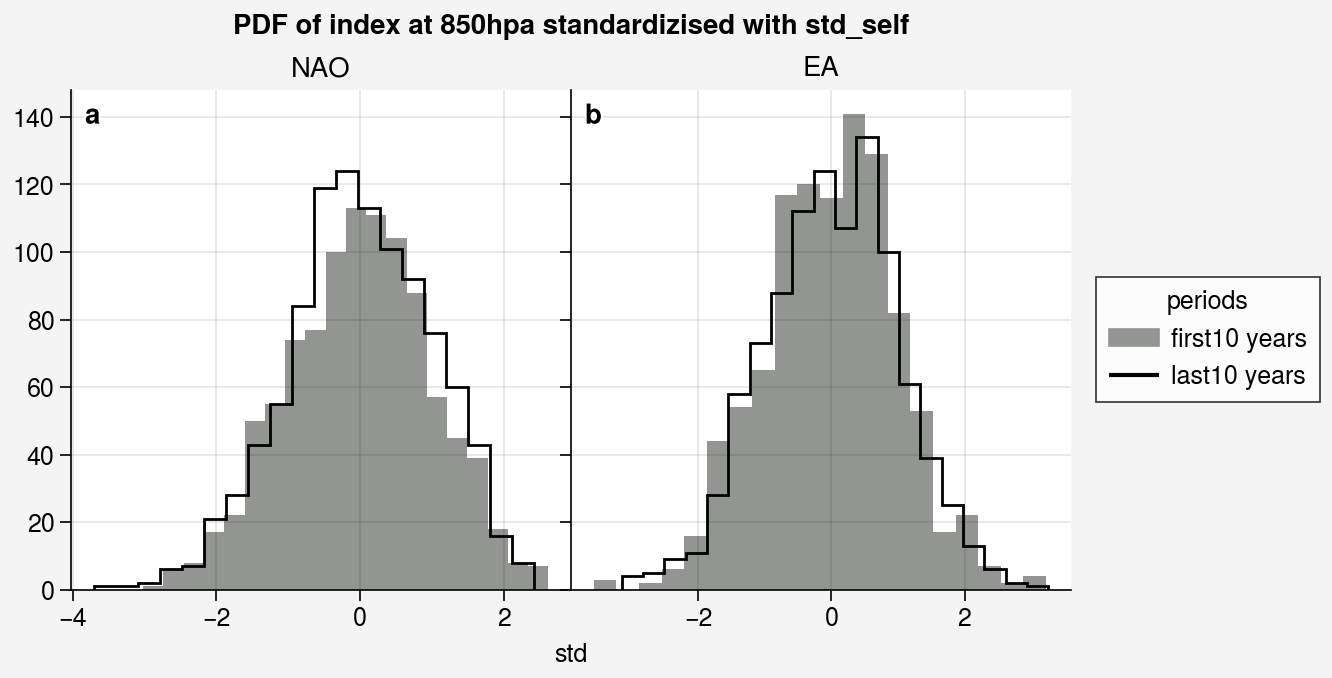

In [11]:
pdf_plots.plot_hist(first10_all_period,last10_all_period,'std_self',hlayers = 85000,bins = 20)

/work/mh0033/m300883/3rdPanel/src/plots/PDF.py:22: ProplotWarning: Got conflicting or duplicate keyword args: {'xlocator': array([-4., -2.,  0.,  2.,  4.]), 'xticks': 5}. Using the first one.
  axes.format(
/work/mh0033/m300883/3rdPanel/src/plots/PDF.py:22: ProplotWarning: Got conflicting or duplicate keyword args: {'xlocator': array([-4., -2.,  0.,  2.,  4.]), 'xticks': 5}. Using the first one.
  axes.format(


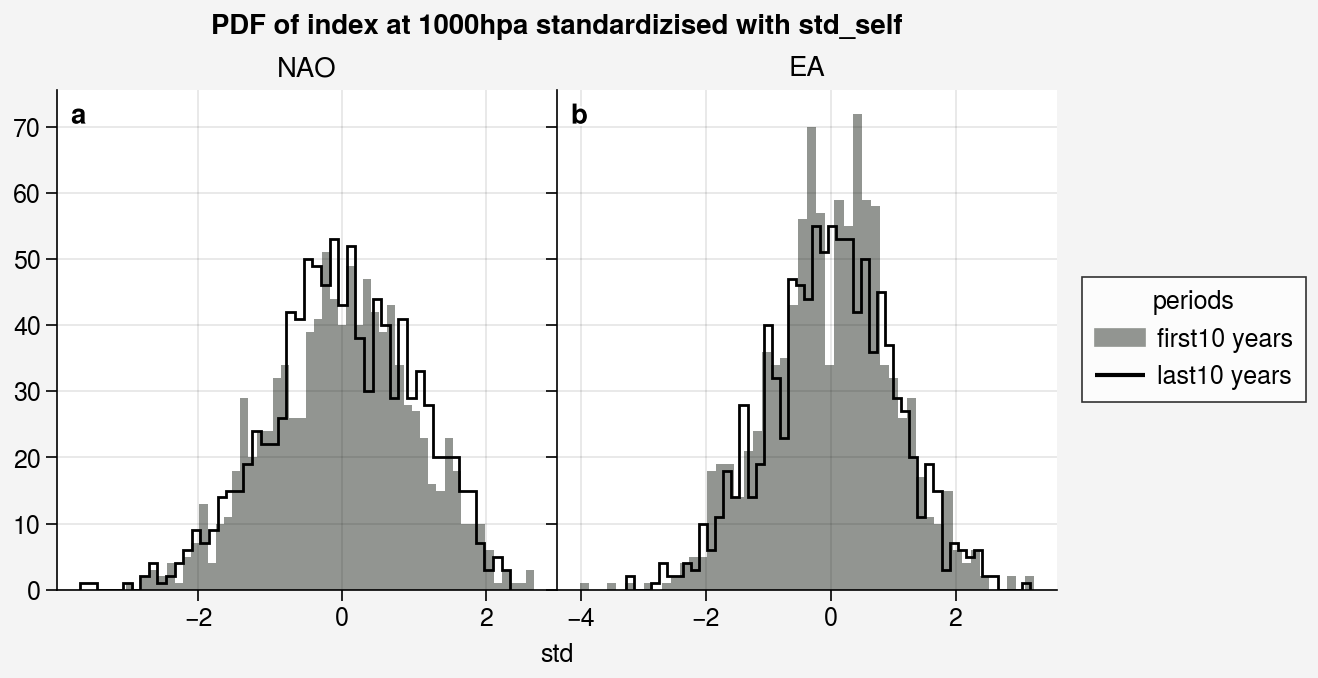

In [12]:
pdf_plots.plot_hist(first10_all_period,last10_all_period,'std_self',hlayers = 100000,bins = 50)


## Violin

CartesianAxesSubplot(index=(1, 1), number=2)

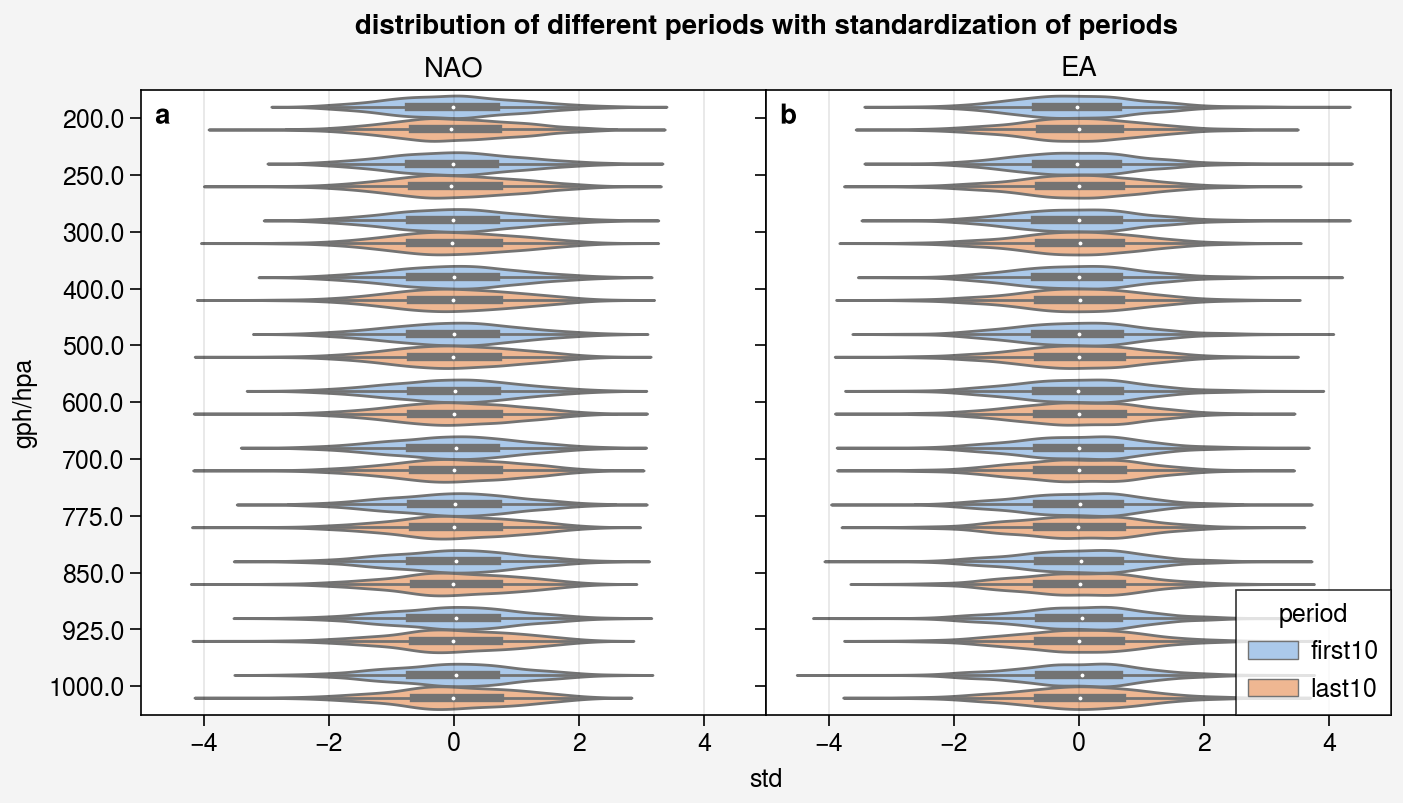

In [13]:
violin_plots.plot_vilion(first10_all_period, last10_all_period,std_type = 'periods')

## Profile

Extreme count

In [14]:
first10_all_period_ec = extreme.period_extreme_count(first10_all_period)
last10_all_period_ec = extreme.period_extreme_count(last10_all_period)

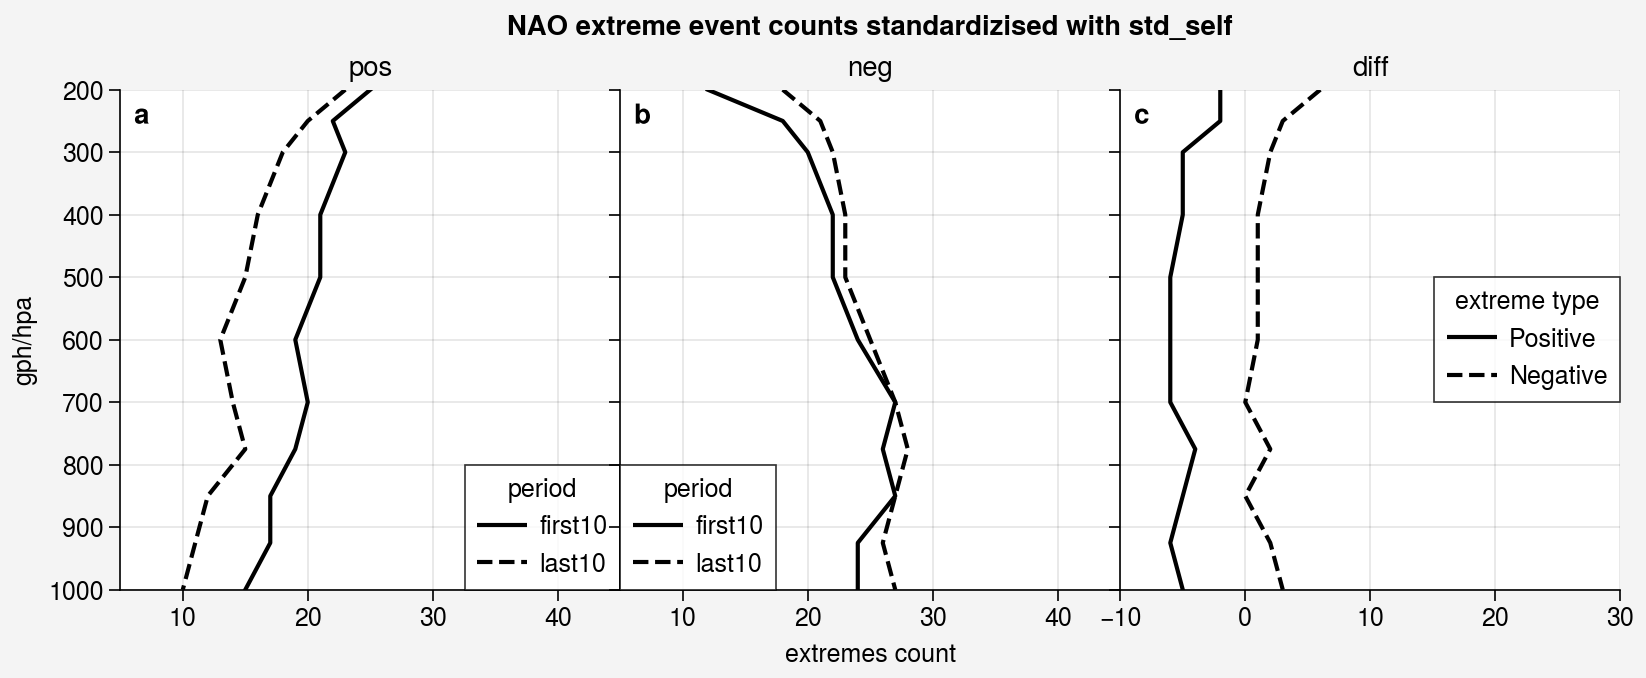

In [15]:
profile_plots.plot_vertical_profile(first10_all_period_ec,last10_all_period_ec,mode = 'NAO',std_type='std_self')

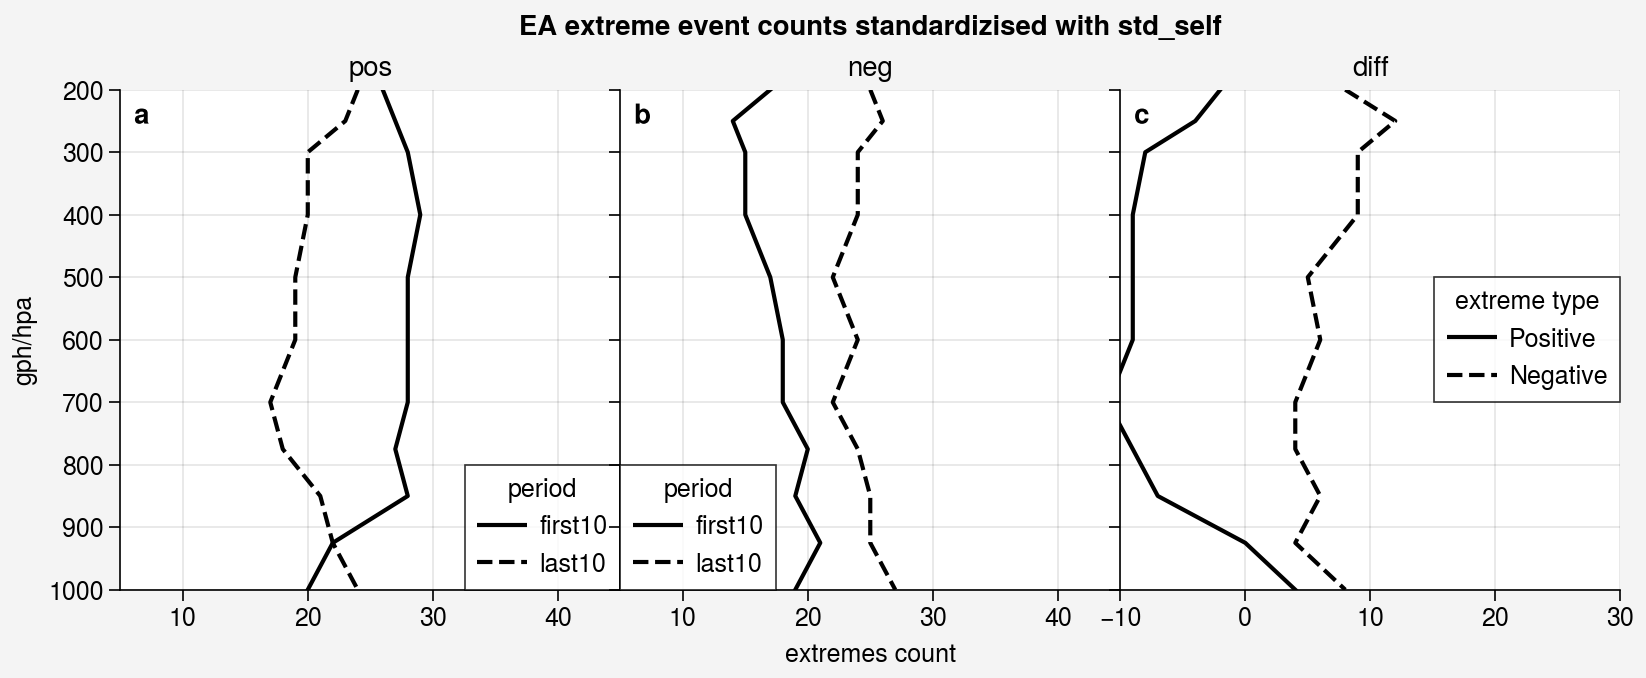

In [16]:
profile_plots.plot_vertical_profile(first10_all_period_ec,last10_all_period_ec,mode = 'EA',std_type='std_self')

# stadnard with *whole* mean and std

In [8]:
all_all_whole = standardize(all_all)

In [9]:
first10_all_whole = all_all_whole.isel(time = slice(0,10))
last10_all_whole = all_all_whole.isel(time = slice(-10,all_all.time.size))

## PDF

/work/mh0033/m300883/3rdPanel/src/plots/PDF.py:22: ProplotWarning: Got conflicting or duplicate keyword args: {'xlocator': array([-4., -2.,  0.,  2.,  4.]), 'xticks': 5}. Using the first one.
  axes.format(
/work/mh0033/m300883/3rdPanel/src/plots/PDF.py:22: ProplotWarning: Got conflicting or duplicate keyword args: {'xlocator': array([-4., -2.,  0.,  2.,  4.]), 'xticks': 5}. Using the first one.
  axes.format(


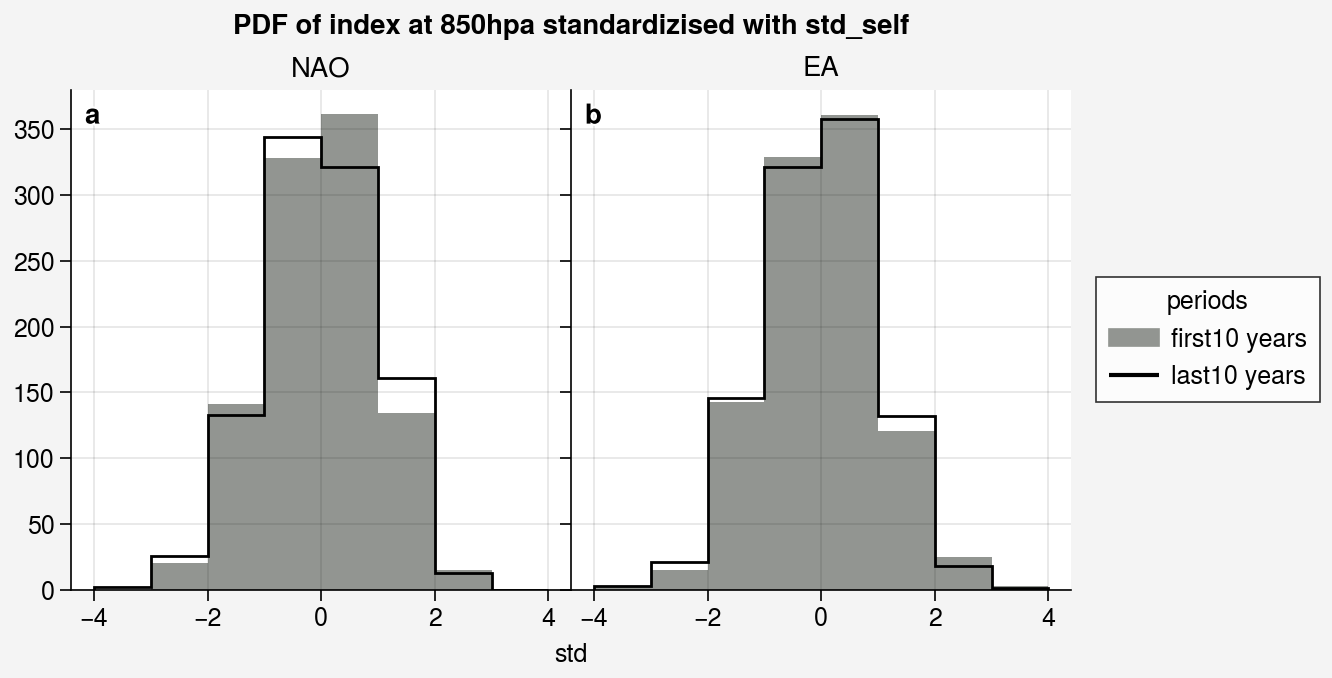

In [11]:
pdf_plots.plot_hist(first10_all_whole,last10_all_whole,'std_self',hlayers = 85000,bins = np.arange(-4,4.1,1))

/work/mh0033/m300883/3rdPanel/src/plots/PDF.py:22: ProplotWarning: Got conflicting or duplicate keyword args: {'xlocator': array([-4., -2.,  0.,  2.,  4.]), 'xticks': 5}. Using the first one.
  axes.format(
/work/mh0033/m300883/3rdPanel/src/plots/PDF.py:22: ProplotWarning: Got conflicting or duplicate keyword args: {'xlocator': array([-4., -2.,  0.,  2.,  4.]), 'xticks': 5}. Using the first one.
  axes.format(


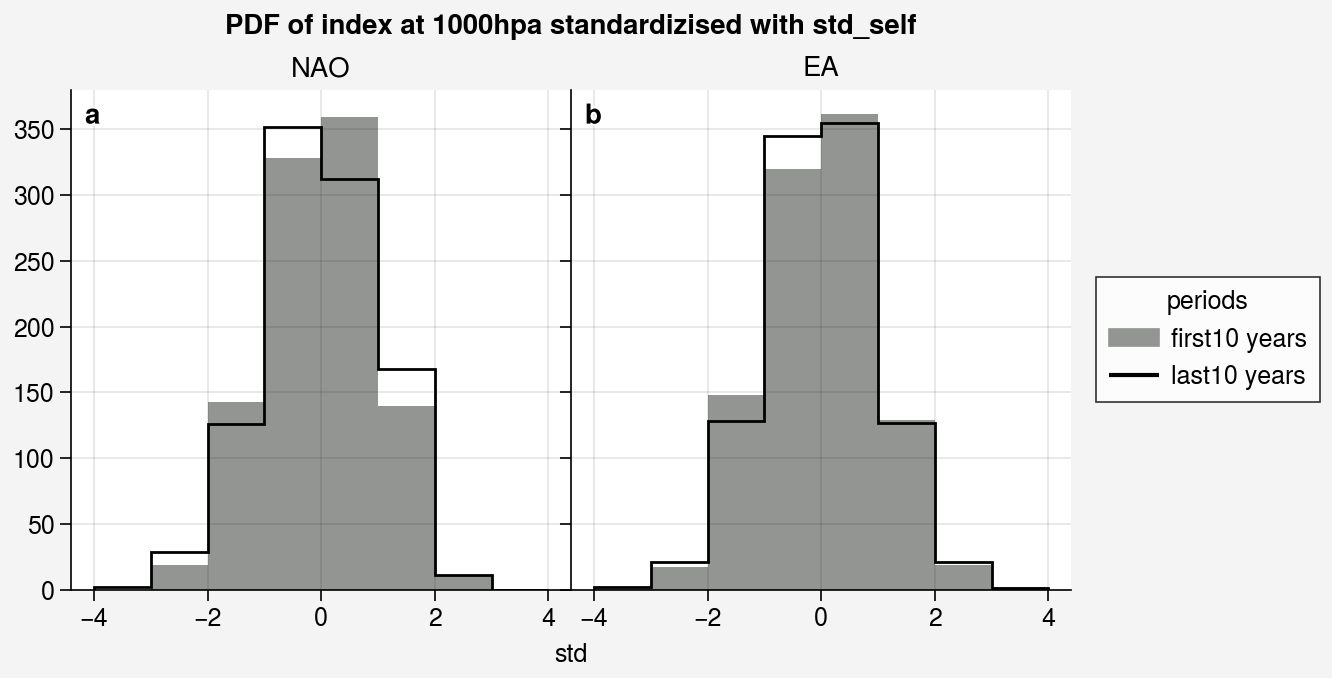

In [12]:
pdf_plots.plot_hist(first10_all_whole,last10_all_whole,'std_self',hlayers = 100000,bins = np.arange(-4,4.1,1))


In [22]:
# first10_all_whole.to_netcdf("/work/mh0033/m300883/3rdPanel/data/allPattern/dep/all_pattern/first10_all_whole.nc")

In [23]:
# last10_all_whole.to_netcdf("/work/mh0033/m300883/3rdPanel/data/allPattern/dep/all_pattern/last10_all_whole.nc")

In [20]:
whole_NAO = violin_plots.xr2df(first10_all_whole,last10_all_whole,mode = 'NAO')

In [21]:
whole_NAO

,period,hlayers,NAO
com,,,
0,first10,200.0,0.760732
1,first10,200.0,0.234550
2,first10,200.0,-0.241520
3,first10,200.0,0.701282
4,first10,200.0,2.128259
...,...,...,...
995,last10,1000.0,-1.349502
996,last10,1000.0,-0.873119
997,last10,1000.0,-0.040152


In [22]:
whole_NAO_500 = whole_NAO[whole_NAO['hlayers'] == 500][['period','NAO']].reset_index()

In [23]:
whole_NAO_500

,com,period,NAO
0,0,first10,0.758179
1,1,first10,0.099888
2,2,first10,-0.147244
3,3,first10,0.962472
4,4,first10,2.161987
...,...,...,...
1995,995,last10,-1.050777
1996,996,last10,-0.561610
1997,997,last10,-0.314160
1998,998,last10,-1.568521


<AxesSubplot:xlabel='NAO', ylabel='Count'>

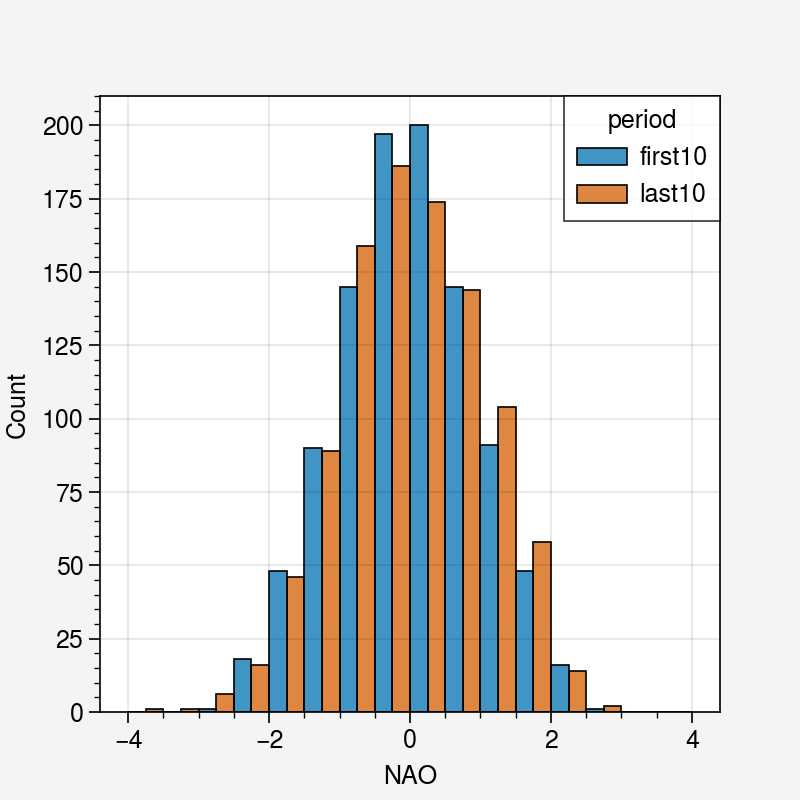

In [24]:
sns.histplot(data = whole_NAO_500,x = 'NAO',hue = 'period',multiple = "dodge",shrink=1,bins = np.arange(-4,4.1,0.5))

## Vilion plots

CartesianAxesSubplot(index=(1, 1), number=2)

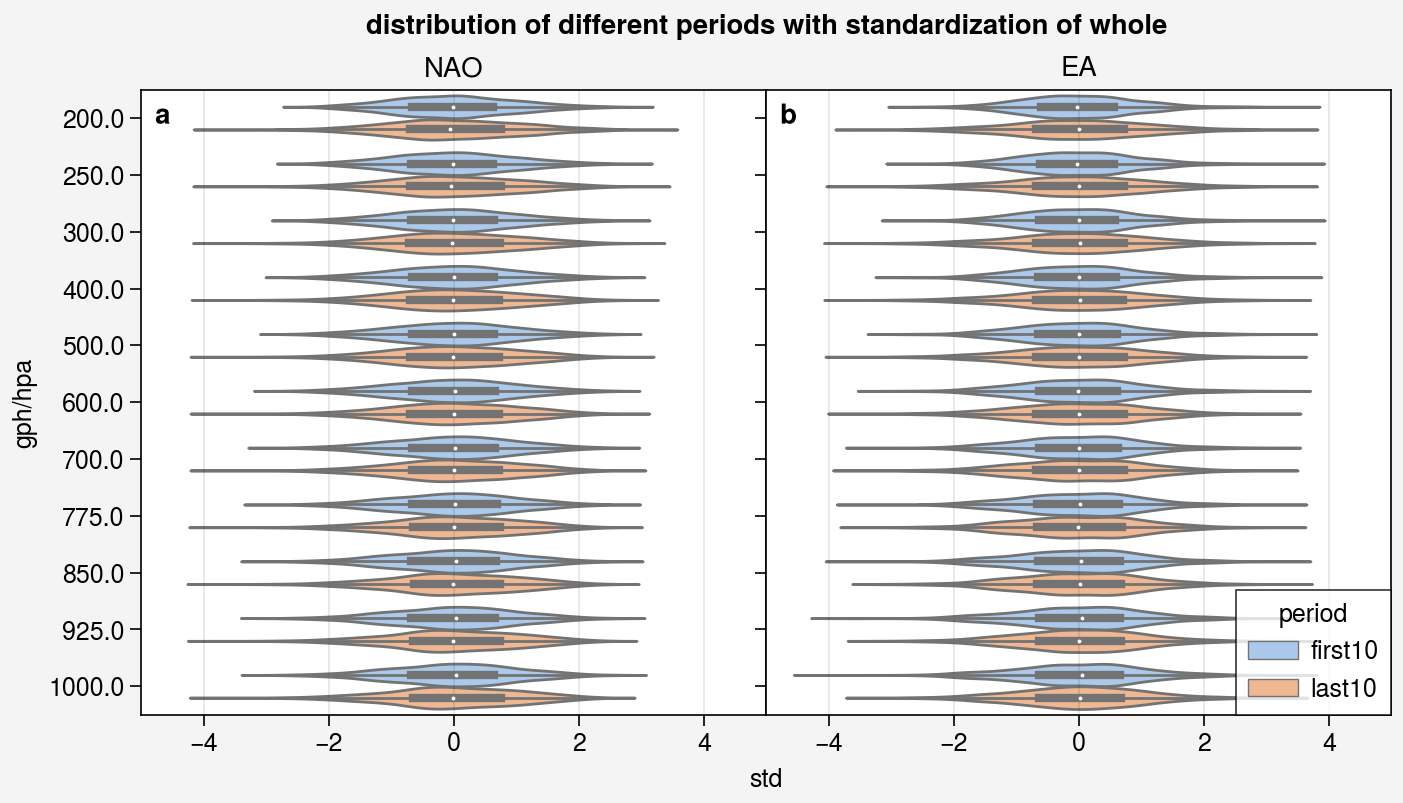

In [25]:
violin_plots.plot_vilion(first10_all_whole, last10_all_whole, 'whole')

## Profile

Extreme count

In [26]:
first10_all_whole_ec = extreme.period_extreme_count(first10_all_whole)
last10_all_whole_ec = extreme.period_extreme_count(last10_all_whole)

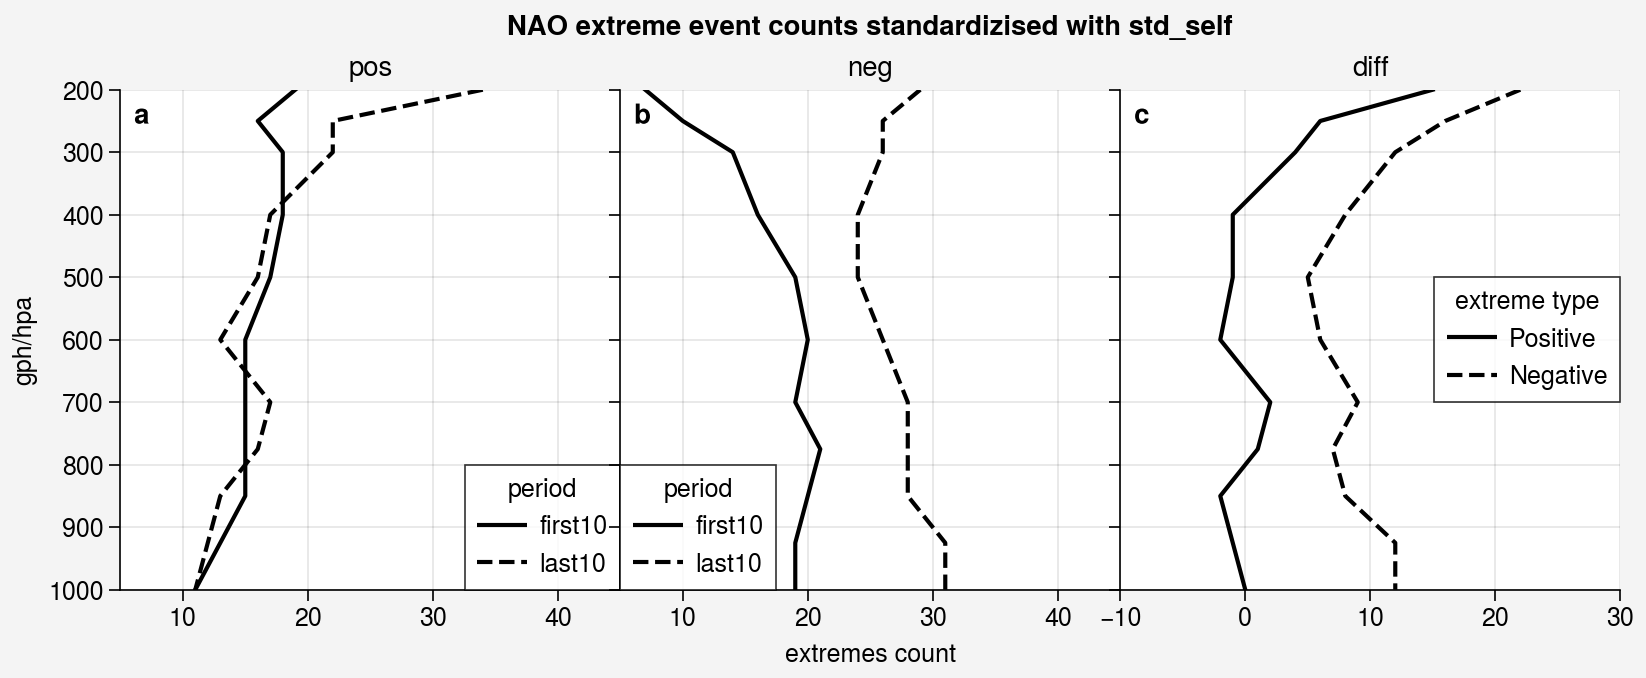

In [27]:
profile_plots.plot_vertical_profile(first10_all_whole_ec,last10_all_whole_ec,mode = 'NAO',std_type='std_self')

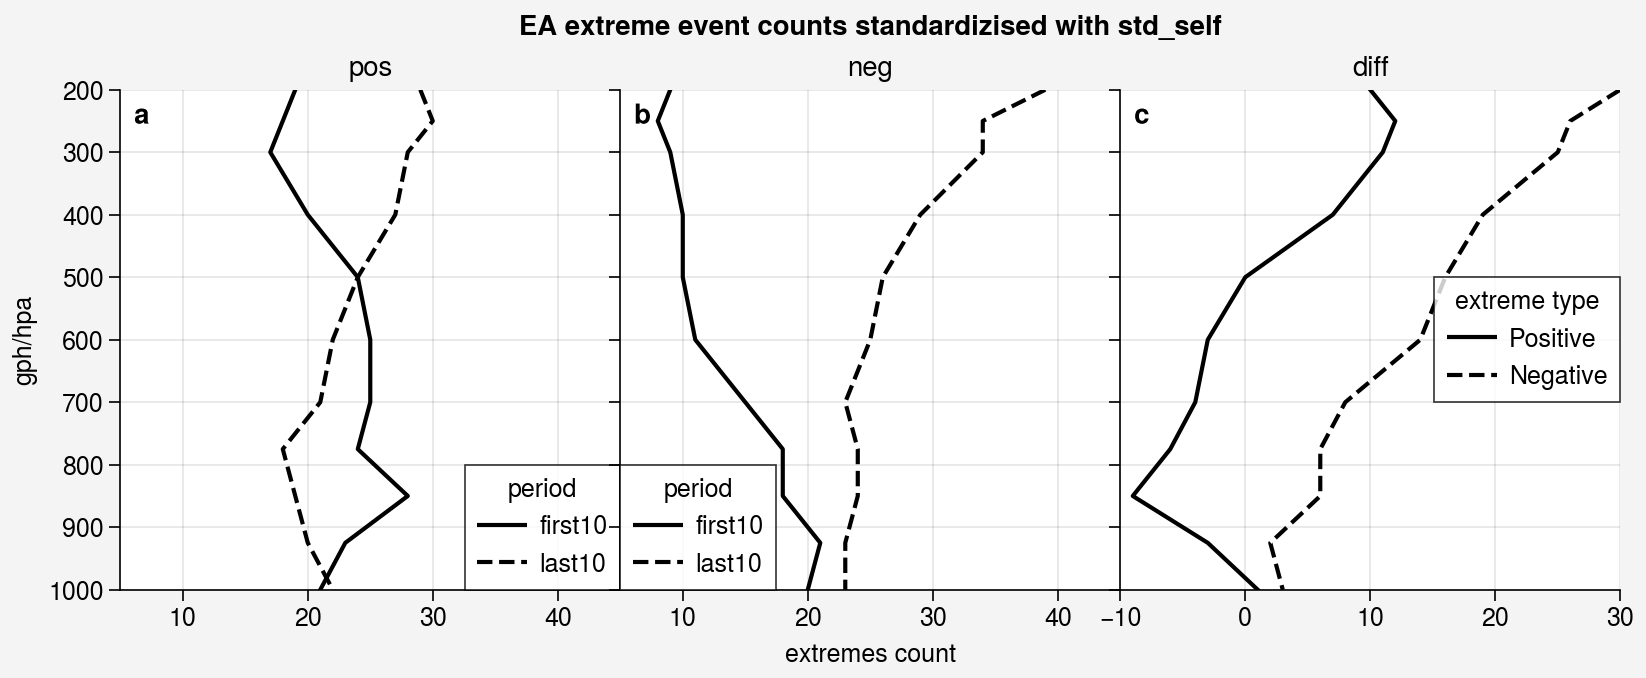

In [28]:
profile_plots.plot_vertical_profile(first10_all_whole_ec,last10_all_whole_ec,mode = 'EA',std_type='std_self')